# FBA and pFBA Simulations

By Christina Schenk and Garrett Roell

Tested on biodesign_3.7 kernel on jprime


This notebook performs flux balance analysis (FBA) and parsimonious FBA for R. opacus in glucose and phenol growth conditions and creates plots to compare the results with experimental data.

### Methods: 
<ol>
<li>Compare phenol 13CMFA fluxes to FBA and pFBA predictions: Scatter plots and flux maps</li>
<li>Compare glucose 13CMFA fluxes to FBA and pFBA predictions: Scatter plots and flux maps</li>
<li>Calculate FBA and pFBA growth rates for each of the experimental conditions</li>
<li>Plot growth rates in comparison to experimental data</li>
</ol>

#### The data uses the following mapping as introduced in Notebook E:

#### **Glucose**:

#### Rhiannon 2018 metabolomics and OD data:
* Metabolomics and OD data for WT Glucose (**WT-G**)

#### **Phenol**:
#### Henson data:
* WT 0.5 g/L Phenol (3 trials) (**WT-P**)
* PVHG6 0.5 g/L Phenol (3 trials) (**PVHG-P**)


##### **Import python packages**

In [1]:
import pandas as pd
import numpy as np
import cobra
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
import matplotlib.image as mpimg
import matplotlib.cm as cm
import scipy
import sys

SourceDir = '../src'
sys.path.append(SourceDir)
from utils import *

output_dir = '../plots/'
from plot import *

#### **Load Genome Scale Model**

In [2]:
model = cobra.io.read_sbml_model("../models/Ropacus_annotated_curated.xml")

# Phenol FBA and pFBA

#### **Run Phenol FBA**

In [3]:
phenol_fba_solution =  FBA_pred(model, 'phenol') 

{'EX_ca2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_zn2_e': 1000.0,
 'EX_phenol_e': 100}

#### **Save Phenol FBA Genome Scale Fluxes**

In [4]:
phenol_fba_df = fba_solution_to_df(model, phenol_fba_solution)
phenol_fba_df.to_csv('../data/genome_scale_fluxes/phenol_fba.csv', index=False)

phenol_fba_df.head(5)

,reaction_id,reaction_name,reaction_reaction,flux
0,12DGR140tipp,"1,2 diacylglycerol transport via flipping (per...",12dgr140_p --> 12dgr140_c,0.0
1,13PPDH,"1,3-propanediol dehydrogenase",3hppnl_c + h_c + nadh_c <=> 13ppd_c + nad_c,0.0
2,1P2CBXLCYCL,1 Pyrroline 2 carboxylate cyclation,5a2opntn_c <=> 1p2cbxl_c + h2o_c + h_c,0.0
3,1P2CBXLR,Delta1 piperideine 2 carboxylate reductase,1p2cbxl_c + 2.0 h_c + nadph_c --> nadp_c + pro...,0.0
4,23CTI1,Decenyl coa cis trans isomerization cis dec 3...,decoa_c --> dc2coa_c + h_c,0.0


#### **Run Phenol pFBA**

In [5]:
phenol_pfba_solution =  pFBA_pred(model, 'phenol') 

{'EX_ca2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_zn2_e': 1000.0,
 'EX_phenol_e': 100}

#### **Save Phenol pFBA Genome Scale Fluxes**

In [6]:
phenol_pfba_df = fba_solution_to_df(model, phenol_pfba_solution)
phenol_pfba_df.to_csv('../data/genome_scale_fluxes/phenol_pfba.csv', index=False)

phenol_pfba_df.head(5)

,reaction_id,reaction_name,reaction_reaction,flux
0,12DGR140tipp,"1,2 diacylglycerol transport via flipping (per...",12dgr140_p --> 12dgr140_c,0.0
1,13PPDH,"1,3-propanediol dehydrogenase",3hppnl_c + h_c + nadh_c <=> 13ppd_c + nad_c,0.0
2,1P2CBXLCYCL,1 Pyrroline 2 carboxylate cyclation,5a2opntn_c <=> 1p2cbxl_c + h2o_c + h_c,0.0
3,1P2CBXLR,Delta1 piperideine 2 carboxylate reductase,1p2cbxl_c + 2.0 h_c + nadph_c --> nadp_c + pro...,0.0
4,23CTI1,Decenyl coa cis trans isomerization cis dec 3...,decoa_c --> dc2coa_c + h_c,0.0


#### **Load Phenol 13C MFA Data**

In [7]:
phenol_fluxes = pd.read_csv('../data/central_fluxes/phenol_13C.csv')

# Remove rows that do not have a mapping to the GSM
phenol_fluxes.dropna(subset = ["Forward Reactions"], inplace=True)
print(f'There are {len(phenol_fluxes)} fluxes that can be compared between the MFA and FBA')

phenol_fluxes.head()

There are 44 fluxes that can be compared between the MFA and FBA


,Pathway,Forward Reactions,Reaction,Location on map,Flux,90% Confidence Lower Bound,90% Confidence Upper Bound
0,Substrate Uptake,PHEMOX,Phenol.ext -> AcCoA + SucCoA,"( 80, -450)",100.0000,100.0000,100.0000
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-0.4793,-1.4219,0.9306
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",-2.0000,-2.0000,-0.7683
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",-2.0000,-2.0000,-0.7683
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",-2.0000,-2.0000,-0.7683


#### **Map Phenol FBA and pFBA fluxes to 13C MFA Reactions**

In [8]:
phenol_fluxes = add_pred_fluxes_to_13c_df_without_std(phenol_fluxes, phenol_fba_solution, 'FBA', 'WT')
phenol_fluxes =  add_pred_fluxes_to_13c_df_without_std(phenol_fluxes, phenol_pfba_solution, 'pFBA', 'WT')
phenol_fluxes.head()

,Pathway,Forward Reactions,Reaction,Location on map,Flux,90% Confidence Lower Bound,90% Confidence Upper Bound,FBA WT Value,pFBA WT Value
0,Substrate Uptake,PHEMOX,Phenol.ext -> AcCoA + SucCoA,"( 80, -450)",100.0000,100.0000,100.0000,100.000000,100.000000
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-0.4793,-1.4219,0.9306,-1.802531,-1.802531
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",-2.0000,-2.0000,-0.7683,-13.929962,-13.929962
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",-2.0000,-2.0000,-0.7683,-13.929962,-13.929962
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",-2.0000,-2.0000,-0.7683,-19.538518,-19.538518


#### **Save Phenol FBA and pFBA Central Flux Predictions**

In [9]:
phenol_fluxes.to_csv('../data/central_fluxes/phenol_FBA_pFBA.csv', index=False)

#### **Plot Phenol FBA Fluxes vs 13C MFA Fluxes**

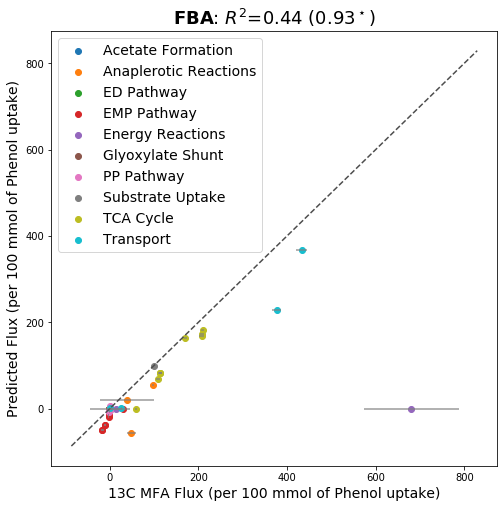

In [10]:
obs_vs_pred_scatter_plot_with_std(phenol_fluxes, substrate='phenol', method='FBA', strain='WT', output_dir=output_dir)

#### **Plot Phenol pFBA Fluxes vs 13C MFA Fluxes**

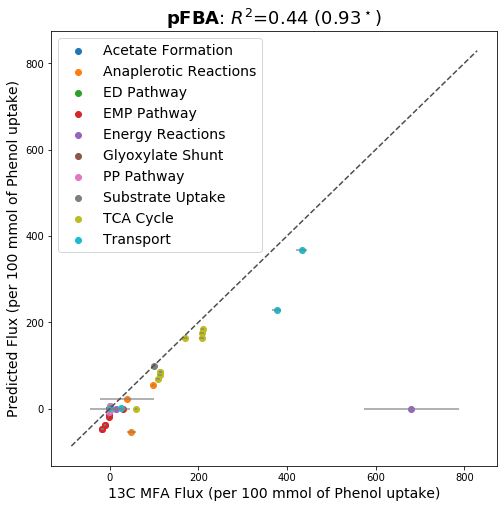

In [11]:
obs_vs_pred_scatter_plot_with_std(phenol_fluxes, substrate='phenol', method='pFBA', strain='WT', output_dir=output_dir)

#### **Display Phenol 13C MFA Flux Map**

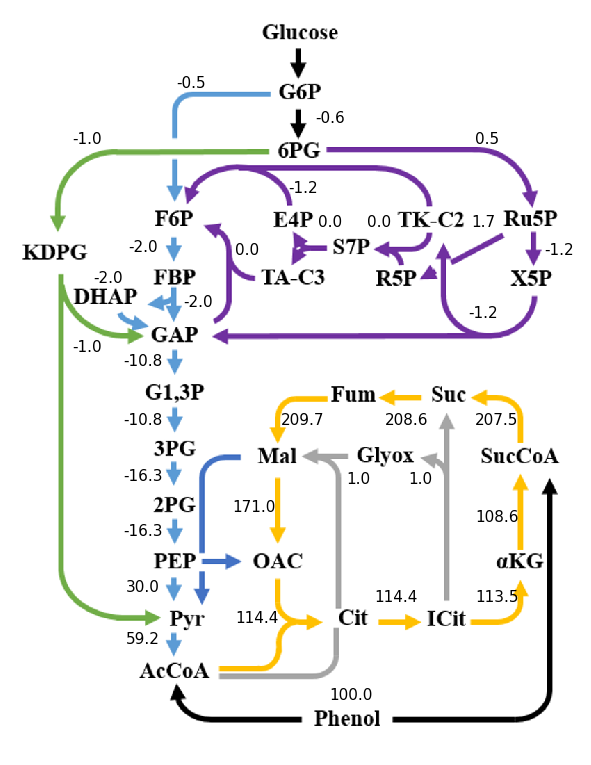

In [12]:
generate_flux_map(phenol_fluxes, 'Flux', substrate='phenol', method='13C_MFA', strain="WT", output_dir=output_dir)

#### **Display Phenol FBA Flux Map**

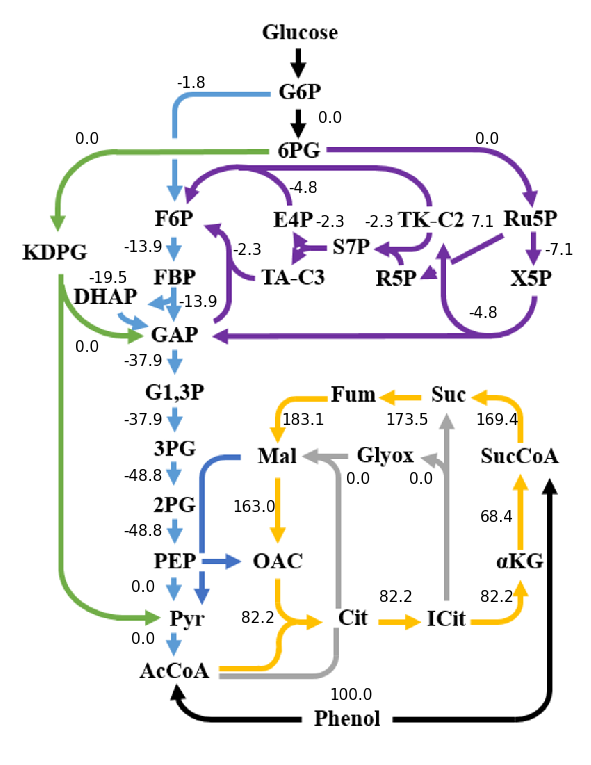

In [13]:
generate_flux_map(phenol_fluxes, 'FBA WT Value', substrate='phenol', method='FBA', strain="WT", output_dir=output_dir)

#### **Display Phenol pFBA Flux Map**

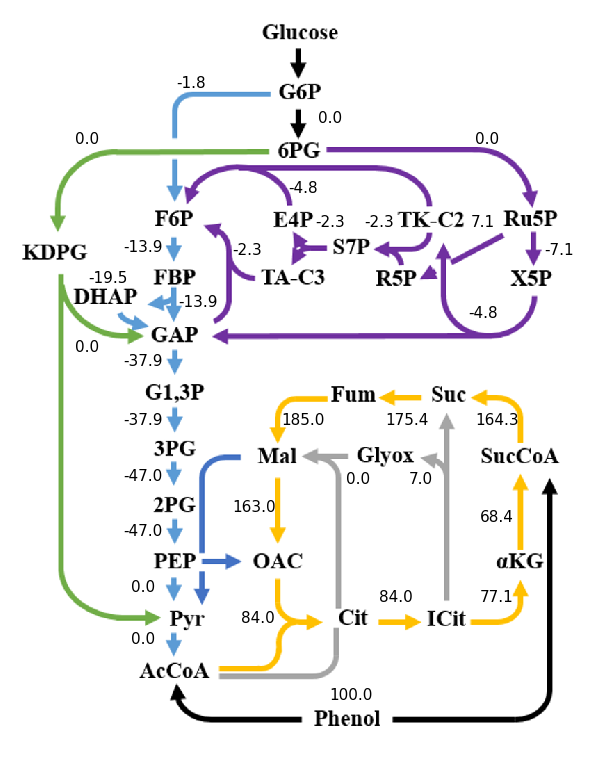

In [14]:
generate_flux_map(phenol_fluxes, 'pFBA WT Value', substrate='phenol', method='pFBA', strain="WT", output_dir=output_dir)

# Glucose FBA and pFBA

#### **Run Glucose FBA**

In [15]:
glucose_fba_solution =  FBA_pred(model, 'glucose') 

{'EX_ca2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_glc__D_e': 100,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_zn2_e': 1000.0}

#### **Save Glucose FBA Genome Scale Fluxes**

In [16]:
glucose_fba_df = fba_solution_to_df(model, glucose_fba_solution)
glucose_fba_df.to_csv('../data/genome_scale_fluxes/glucose_fba.csv', index=False)

glucose_fba_df.head(5)

,reaction_id,reaction_name,reaction_reaction,flux
0,12DGR140tipp,"1,2 diacylglycerol transport via flipping (per...",12dgr140_p --> 12dgr140_c,0.0
1,13PPDH,"1,3-propanediol dehydrogenase",3hppnl_c + h_c + nadh_c <=> 13ppd_c + nad_c,0.0
2,1P2CBXLCYCL,1 Pyrroline 2 carboxylate cyclation,5a2opntn_c <=> 1p2cbxl_c + h2o_c + h_c,0.0
3,1P2CBXLR,Delta1 piperideine 2 carboxylate reductase,1p2cbxl_c + 2.0 h_c + nadph_c --> nadp_c + pro...,0.0
4,23CTI1,Decenyl coa cis trans isomerization cis dec 3...,decoa_c --> dc2coa_c + h_c,0.0


#### **Run Glucose pFBA**

In [17]:
glucose_pfba_solution =  pFBA_pred(model, 'glucose') 

{'EX_ca2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_glc__D_e': 100,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_zn2_e': 1000.0}

#### **Save Glucose pFBA Genome Scale Fluxes**

In [18]:
glucose_pfba_df = fba_solution_to_df(model, glucose_pfba_solution)
glucose_pfba_df.to_csv('../data/genome_scale_fluxes/glucose_pfba.csv', index=False)

glucose_pfba_df.head(5)

,reaction_id,reaction_name,reaction_reaction,flux
0,12DGR140tipp,"1,2 diacylglycerol transport via flipping (per...",12dgr140_p --> 12dgr140_c,0.0
1,13PPDH,"1,3-propanediol dehydrogenase",3hppnl_c + h_c + nadh_c <=> 13ppd_c + nad_c,0.0
2,1P2CBXLCYCL,1 Pyrroline 2 carboxylate cyclation,5a2opntn_c <=> 1p2cbxl_c + h2o_c + h_c,0.0
3,1P2CBXLR,Delta1 piperideine 2 carboxylate reductase,1p2cbxl_c + 2.0 h_c + nadph_c --> nadp_c + pro...,0.0
4,23CTI1,Decenyl coa cis trans isomerization cis dec 3...,decoa_c --> dc2coa_c + h_c,0.0


#### **Load Glucose 13C MFA Data**

In [19]:
glucose_fluxes = pd.read_csv('../data/central_fluxes/glucose_13C.csv')

# # Remove rows that do not have a mapping to the GSM
glucose_fluxes.dropna(subset = ["Forward Reactions"], inplace=True)
print(f'There are {len(glucose_fluxes)} fluxes that can be compared between the MFA and FBA')

glucose_fluxes.head()

There are 44 fluxes that can be compared between the MFA and FBA


,Pathway,Forward Reactions,Reaction,Location on map,Flux,90% Confidence Lower Bound,90% Confidence Upper Bound
0,Substrate Uptake,reverse_EX_glc__D_e,Gluc.ext + ATP -> G6P,"(50, 460)",100.00,100.00,100.00
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-1.61,-2.09,1.42
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",0.00,0.00,1.91
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",0.00,0.00,1.91
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",0.00,0.00,1.91


#### **Map Glucose FBA and pFBA fluxes to 13C MFA Reactions**

In [20]:
glucose_fluxes = add_pred_fluxes_to_13c_df_without_std(glucose_fluxes, glucose_fba_solution, 'FBA', 'WT')
glucose_fluxes =  add_pred_fluxes_to_13c_df_without_std(glucose_fluxes, glucose_pfba_solution, 'pFBA', 'WT')
glucose_fluxes.head()

,Pathway,Forward Reactions,Reaction,Location on map,Flux,90% Confidence Lower Bound,90% Confidence Upper Bound,FBA WT Value,pFBA WT Value
0,Substrate Uptake,reverse_EX_glc__D_e,Gluc.ext + ATP -> G6P,"(50, 460)",100.00,100.00,100.00,100.000000,100.000000
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-1.61,-2.09,1.42,93.818805,93.818805
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",0.00,0.00,1.91,78.165682,78.165682
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",0.00,0.00,1.91,78.165682,78.165682
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",0.00,0.00,1.91,0.000000,58.985255


#### **Save Glucose FBA and pFBA Central Flux Predictions**

In [21]:
glucose_fluxes.to_csv('../data/central_fluxes/glucose_FBA_pFBA.csv', index=False)

#### **Plot Glucose FBA Fluxes vs 13C MFA Fluxes**

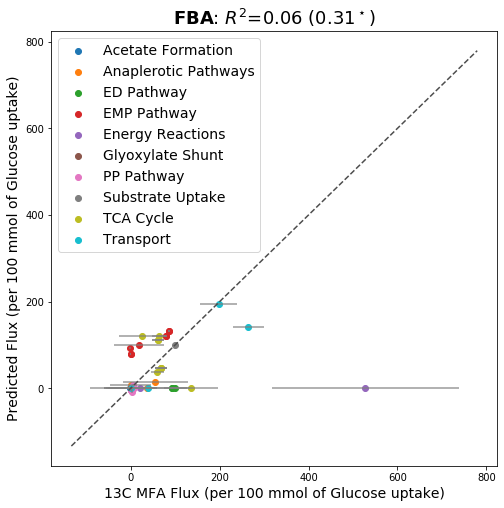

In [22]:
obs_vs_pred_scatter_plot_with_std(glucose_fluxes, substrate='glucose', method='FBA', strain='WT', output_dir=output_dir)

#### **Plot Glucose pFBA Fluxes vs 13C MFA Fluxes**

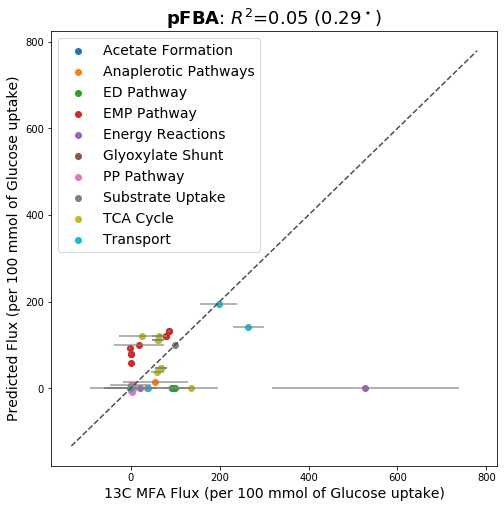

In [23]:
obs_vs_pred_scatter_plot_with_std(glucose_fluxes, substrate='glucose', method='pFBA', strain='WT', output_dir=output_dir)

#### **Display Glucose 13C MFA Flux Map**

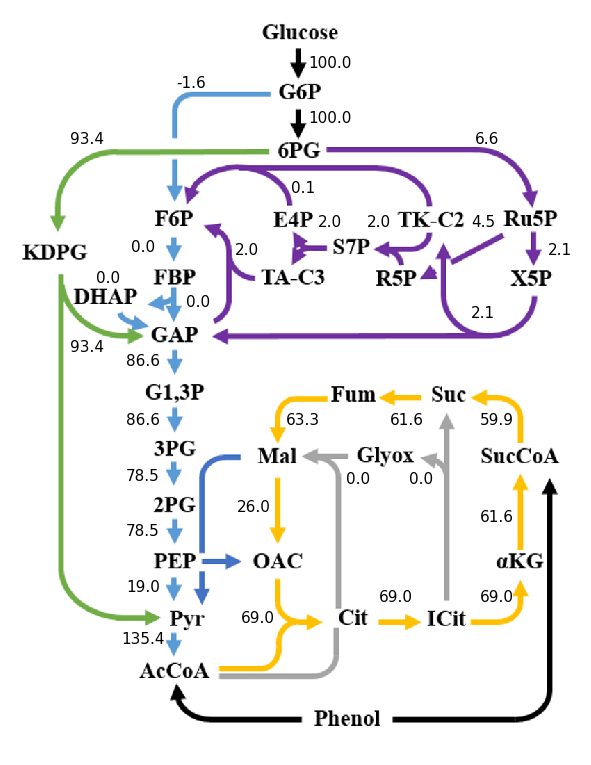

In [24]:
generate_flux_map(glucose_fluxes, 'Flux', substrate='glucose', method='13C_MFA', strain="WT", output_dir=output_dir)

#### **Display Glucose FBA Flux Map**

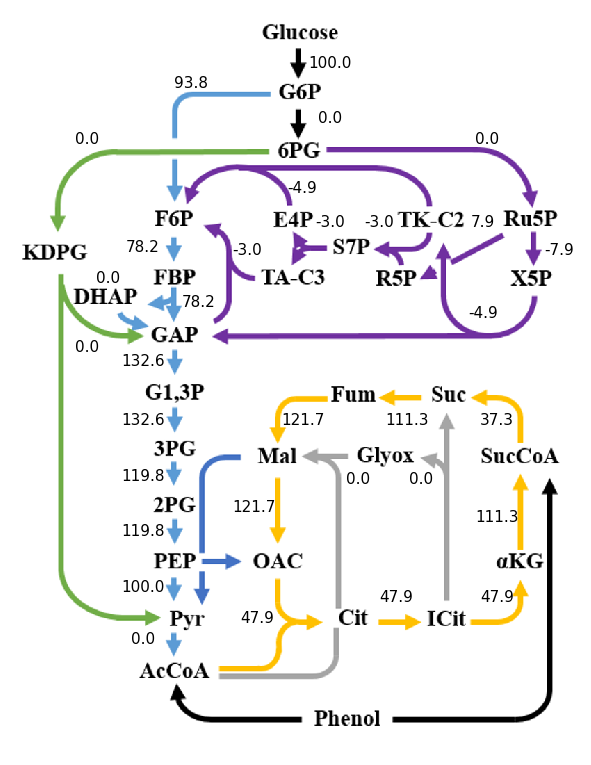

In [25]:
generate_flux_map(glucose_fluxes, 'FBA WT Value', substrate='glucose', method='FBA', strain="WT", output_dir=output_dir)

#### **Display Glucose pFBA Flux Map**

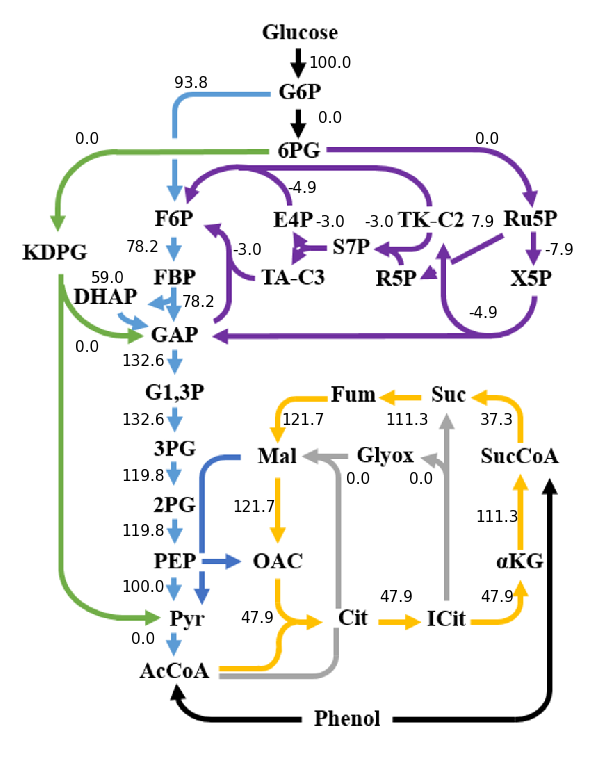

In [26]:
generate_flux_map(glucose_fluxes, 'pFBA WT Value', substrate='glucose', method='pFBA', strain="WT", output_dir=output_dir)

# Growth Rate Predictions

#### **Load experimental growth parameters from Notebook E**

In [27]:
consumption_and_growth_data = pd.read_csv('../data/growth_rates/experimental_growth_parameters.csv', index_col=0)
consumption_and_growth_data

,growth rate,yield coefficient,substrate consumption rate,growth rate std dev,yield coefficient std dev,substrate consumption rate std dev
WT-P,0.065488,0.048868,1.352072,0.001345,0.004836,0.122279
PVHG-P,0.080331,0.040848,1.967485,0.002672,0.001757,0.021785
WT-G,0.260195,0.072789,3.582471,0.004749,0.004117,0.141675


#### **Calculate FBA and pFBA growth rates and add to data frame**

In [28]:
fba_growth_rates = []
pfba_growth_rates = []

# loop over strains
for strain in ['WT-P', 'PVHG-P', 'WT-G']:
    
    # get the growth rate per 100 mmol of substrate uptake 
    if '-P' in strain:
        fba_growth_per_100 = phenol_fba_solution['Growth_Phenol']
        pfba_growth_per_100 = phenol_pfba_solution['Growth_Phenol']
    elif '-G' in strain:
        fba_growth_per_100 = glucose_fba_solution['Growth_Glucose']
        pfba_growth_per_100 = glucose_pfba_solution['Growth_Glucose']
        
    # get the experimental uptake rate
    uptake_rate = consumption_and_growth_data.loc[strain,'substrate consumption rate']
        
    # calculate the growth rate adjusted for substrate uptake rate
    fba_growth_rate = (fba_growth_per_100 / 100) * uptake_rate
    pfba_growth_rate = (pfba_growth_per_100 / 100) * uptake_rate
    
    fba_growth_rates.append(fba_growth_rate)
    pfba_growth_rates.append(fba_growth_rate)
    
# add to data
consumption_and_growth_data['FBA growth rate'] = fba_growth_rates
consumption_and_growth_data['pFBA growth rate'] = pfba_growth_rates

consumption_and_growth_data

,growth rate,yield coefficient,substrate consumption rate,growth rate std dev,yield coefficient std dev,substrate consumption rate std dev,FBA growth rate,pFBA growth rate
WT-P,0.065488,0.048868,1.352072,0.001345,0.004836,0.122279,0.151291,0.151291
PVHG-P,0.080331,0.040848,1.967485,0.002672,0.001757,0.021785,0.220153,0.220153
WT-G,0.260195,0.072789,3.582471,0.004749,0.004117,0.141675,0.480744,0.480744


#### **Save FBA and pFBA Growth Rates**

In [29]:
consumption_and_growth_data.to_csv('../data/growth_rates/fba_pfba_growth_rates.csv', index=True, header= True)

#### **Plot FBA Growth Rates**

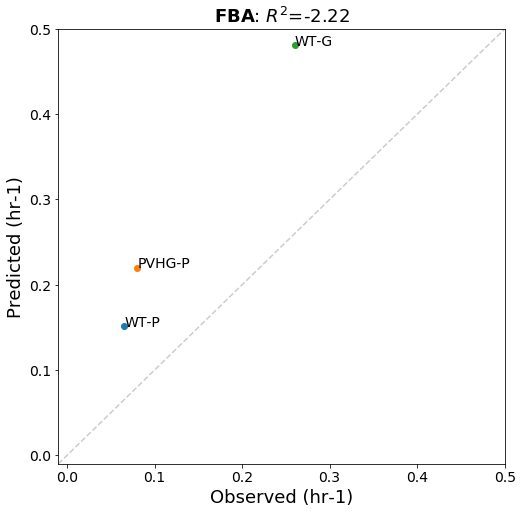

In [30]:
selectedlist = ['WT-P', 'PVHG-P', 'WT-G']
comparison_scatter_plot(
    consumption_and_growth_data.loc[selectedlist, 'growth rate'], 
    consumption_and_growth_data.loc[selectedlist, 'FBA growth rate'], 
    selectedlist, 
    'FBA',
    [-0.01, 0.5], # x limits
    [-0.01, 0.5], # y limits
    output_dir=output_dir
)

#### **Plot pFBA Growth Rates**

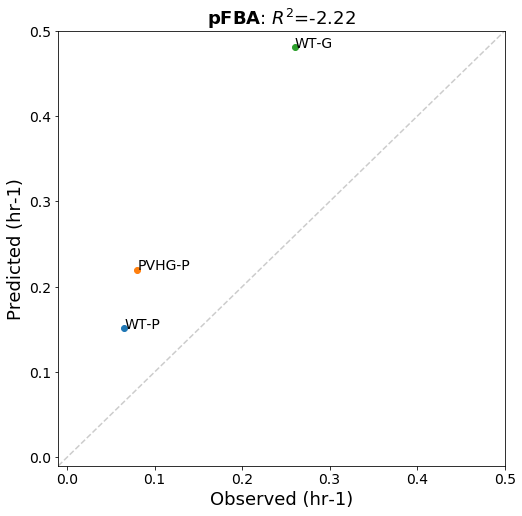

In [31]:
selectedlist = ['WT-P', 'PVHG-P', 'WT-G']
comparison_scatter_plot(
    consumption_and_growth_data.loc[selectedlist, 'growth rate'], 
    consumption_and_growth_data.loc[selectedlist, 'pFBA growth rate'], 
    selectedlist, 
    'pFBA',
    [-0.01, 0.5], # x limits
    [-0.01, 0.5], # y limits
    output_dir=output_dir
)